# Embedding

In [2]:
from sentence_transformers import SentenceTransformer
import polars as pl

In [3]:
df = pl.read_csv("../data/processed/key_word_test_a_supprimer.csv")
model = SentenceTransformer("all-MiniLM-L6-v2")  # léger et performant
embeddings = model.encode(df["review"].to_list(), show_progress_bar=True)


Batches:   0%|          | 0/155 [00:00<?, ?it/s]

# Kmeans

In [4]:
from sklearn.cluster import KMeans
import polars as pl

# Nombre de clusters à tester
k = 3  # tu peux ajuster après visualisation

# Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Ajouter les labels au DataFrame
df = df.with_columns(pl.Series("cluster", cluster_labels))


# 2D Visualization 

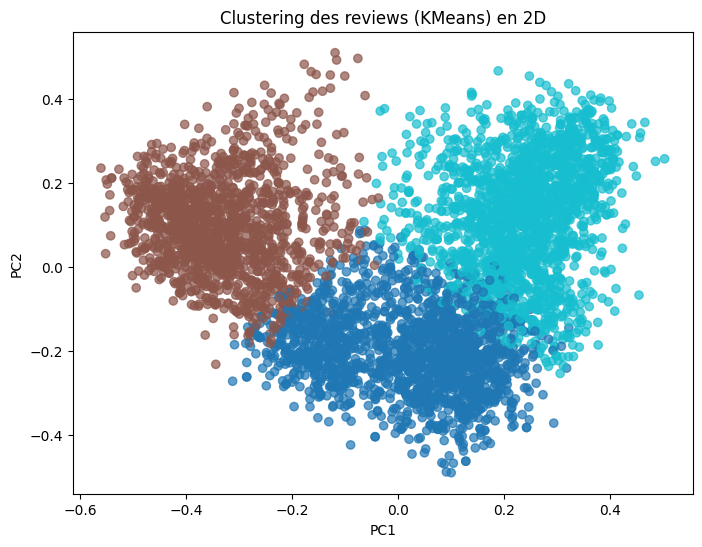

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction en 2D
reduced = PCA(n_components=2).fit_transform(embeddings)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=cluster_labels, cmap="tab10", alpha=0.7)
plt.title("Clustering des reviews (KMeans) en 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


c:\Users\emma\Desktop\project\large-project\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


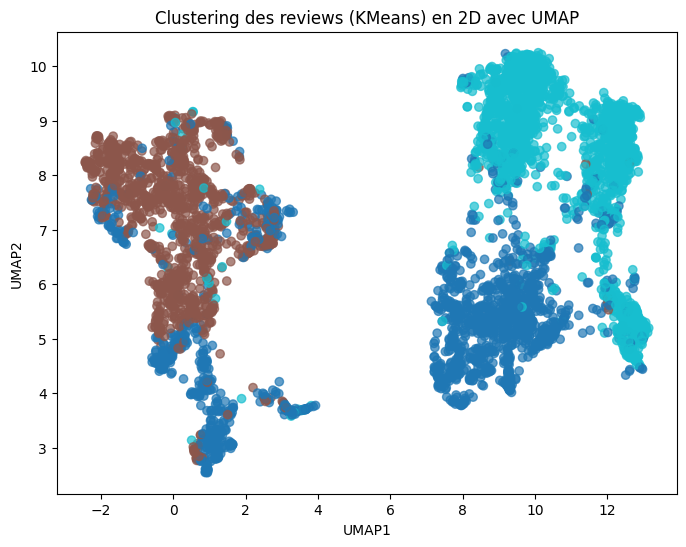

In [13]:
import umap
import matplotlib.pyplot as plt

# --- 1. Réduction en 2D des embeddings avec UMAP ---
reducer = umap.UMAP(n_components=2, random_state=42)
reduced = reducer.fit_transform(embeddings)

# --- 2. Scatter plot selon les clusters KMeans ---
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=cluster_labels, cmap="tab10", alpha=0.7)
plt.title("Clustering des reviews (KMeans) en 2D avec UMAP")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()


## Interpretation

In [6]:
from collections import Counter

for c in sorted(df["cluster"].unique()):
    texts = df.filter(pl.col("cluster") == c)["review"].to_list()
    words = " ".join(texts).split()
    top_words = Counter(words).most_common(10)
    print(f"\nCluster {c} — mots les plus fréquents : {top_words}")



Cluster 0 — mots les plus fréquents : [('get', 549), ('one', 464), ('buy', 458), ('kid', 448), ('dog', 441), ('use', 432), ('love', 426), ('great', 393), ('would', 367), ('like', 367)]

Cluster 1 — mots les plus fréquents : [('family', 1313), ('time', 428), ('go', 365), ('watch', 216), ('friend', 194), ('spend', 180), ('christmas', 168), ('play', 152), ('movie', 151), ('spending', 140)]

Cluster 2 — mots les plus fréquents : [('book', 1885), ('movie', 876), ('read', 780), ('one', 774), ('like', 752), ('child', 721), ('good', 685), ('love', 641), ('get', 622), ('kid', 580)]


## Visualization of category

c:\Users\emma\Desktop\project\large-project\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


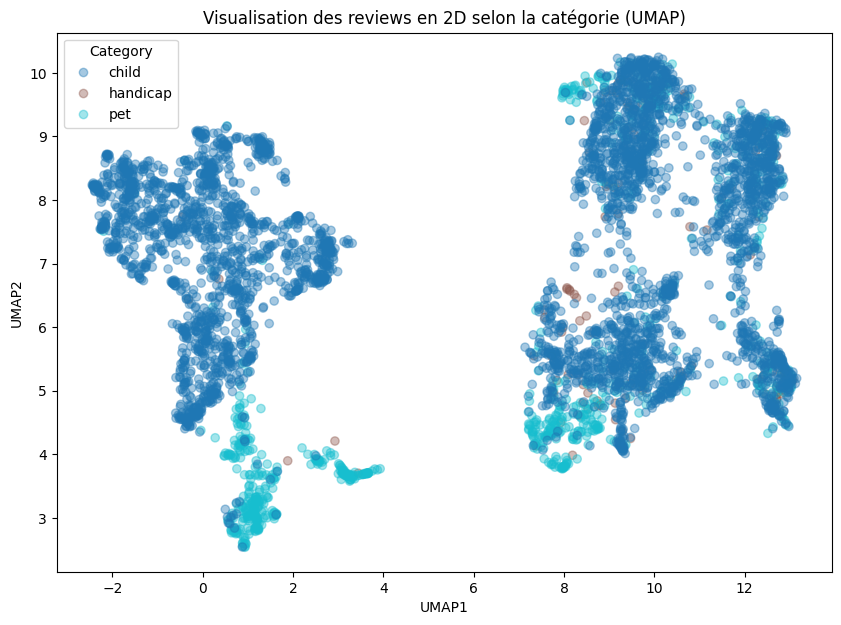

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- 1. Réduction en 2D des embeddings ---
reduced = PCA(n_components=2).fit_transform(embeddings)

# --- 2. Préparer les couleurs selon les catégories ---
categories = df["category"].to_list()
unique_categories = list(set(categories))
color_map = {cat: i for i, cat in enumerate(unique_categories)}
colors = [color_map[cat] for cat in categories]

# --- 3. Scatter plot ---
plt.figure(figsize=(10,7))
scatter = plt.scatter(reduced[:,0], reduced[:,1], c=colors, cmap="tab10", alpha=0.4)
plt.title("Visualisation des reviews en 2D selon la catégorie")
plt.xlabel("PC1")
plt.ylabel("PC2")

# --- 4. Légende avec les catégories ---
handles, _ = scatter.legend_elements()
plt.legend(handles, unique_categories, title="Category")
plt.show()


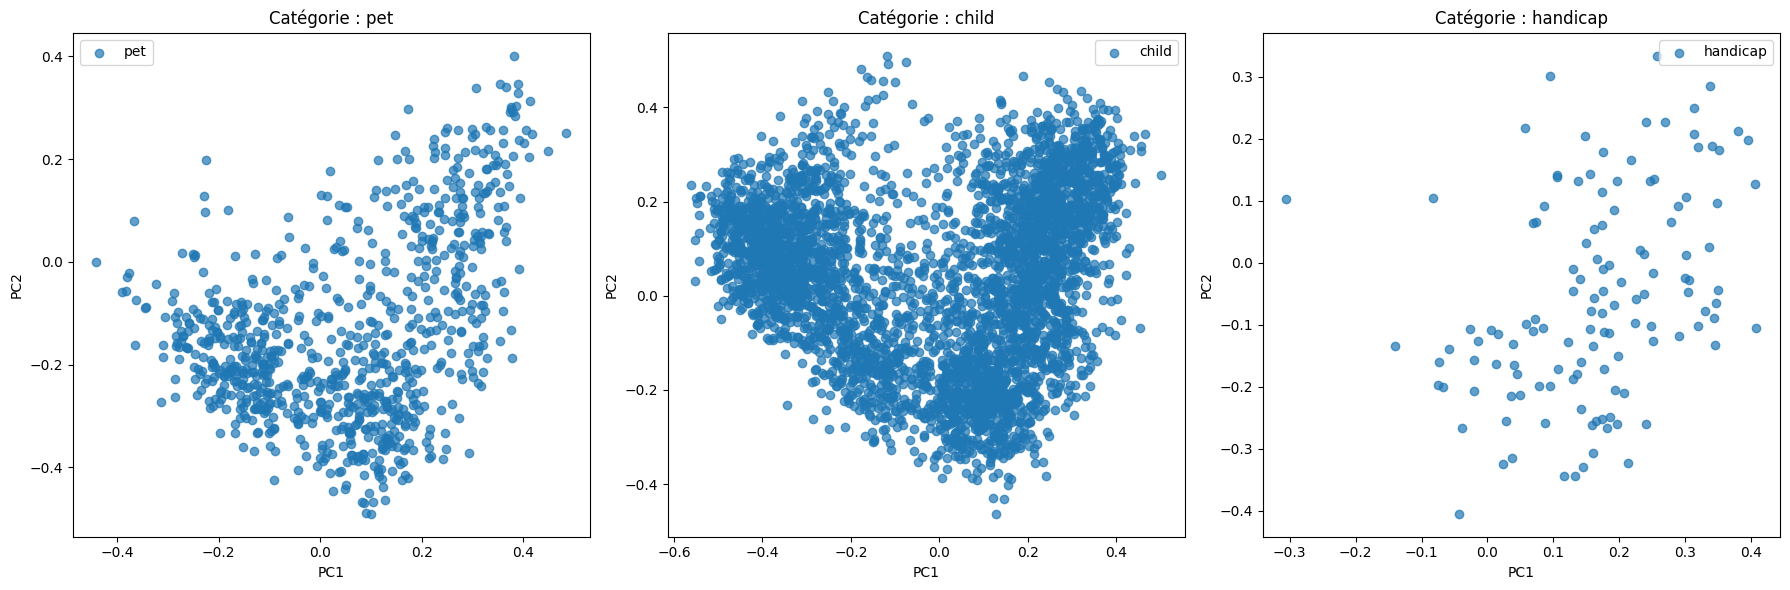

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# --- 1. Réduction en 2D des embeddings ---
reduced = PCA(n_components=2).fit_transform(embeddings)

# --- 2. DataFrame temporaire pour faciliter le filtrage ---
df_plot = pd.DataFrame({
    "PC1": reduced[:,0],
    "PC2": reduced[:,1],
    "category": df["category"].to_list()
})

# --- 3. Liste des catégories à afficher ---
categories_to_plot = ["pet", "child", "handicap"]

# --- 4. Création de la figure avec 3 subplots côte à côte ---
fig, axes = plt.subplots(1, 3, figsize=(18,6))  # 1 ligne, 3 colonnes

for ax, cat in zip(axes, categories_to_plot):
    df_cat = df_plot[df_plot["category"] == cat]
    ax.scatter(df_cat["PC1"], df_cat["PC2"], alpha=0.7, label=cat)
    ax.set_title(f"Catégorie : {cat}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend()

plt.tight_layout()
plt.show()


# Test avec UMAP

c:\Users\emma\Desktop\project\large-project\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


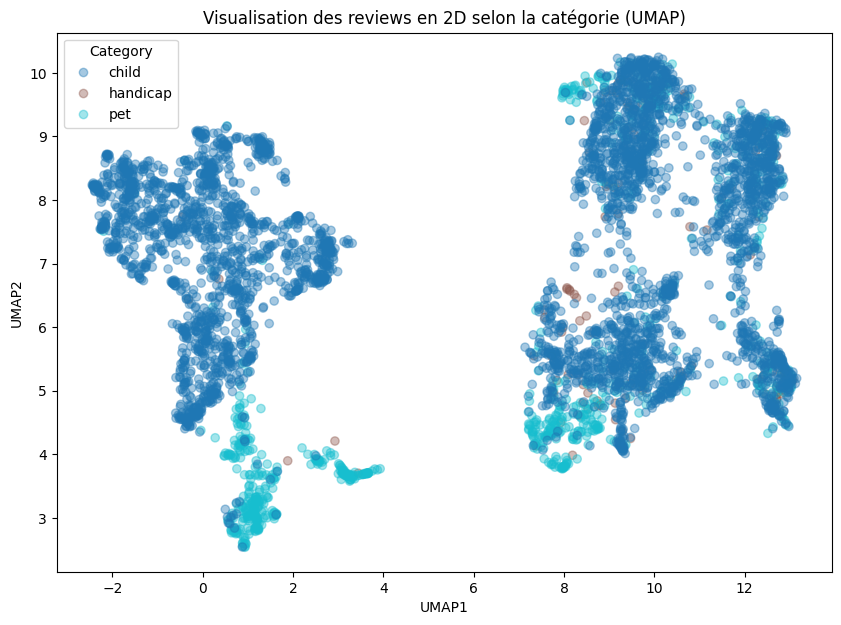

In [12]:
import umap
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Réduction en 2D des embeddings avec UMAP ---
reducer = umap.UMAP(n_components=2, random_state=42)
reduced = reducer.fit_transform(embeddings)

# --- 2. Préparer le DataFrame pour faciliter le plot ---
df_plot = pd.DataFrame({
    "UMAP1": reduced[:,0],
    "UMAP2": reduced[:,1],
    "category": df["category"].to_list()
})

# --- 3. Préparer les couleurs selon les catégories ---
categories = df_plot["category"].to_list()
unique_categories = list(set(categories))
color_map = {cat: i for i, cat in enumerate(unique_categories)}
colors = [color_map[cat] for cat in categories]

# --- 4. Scatter plot ---
plt.figure(figsize=(10,7))
scatter = plt.scatter(df_plot["UMAP1"], df_plot["UMAP2"], c=colors, cmap="tab10", alpha=0.4)
plt.title("Visualisation des reviews en 2D selon la catégorie (UMAP)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

# --- 5. Légende avec les catégories ---
handles, _ = scatter.legend_elements()
plt.legend(handles, unique_categories, title="Category")
plt.show()


c:\Users\emma\Desktop\project\large-project\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


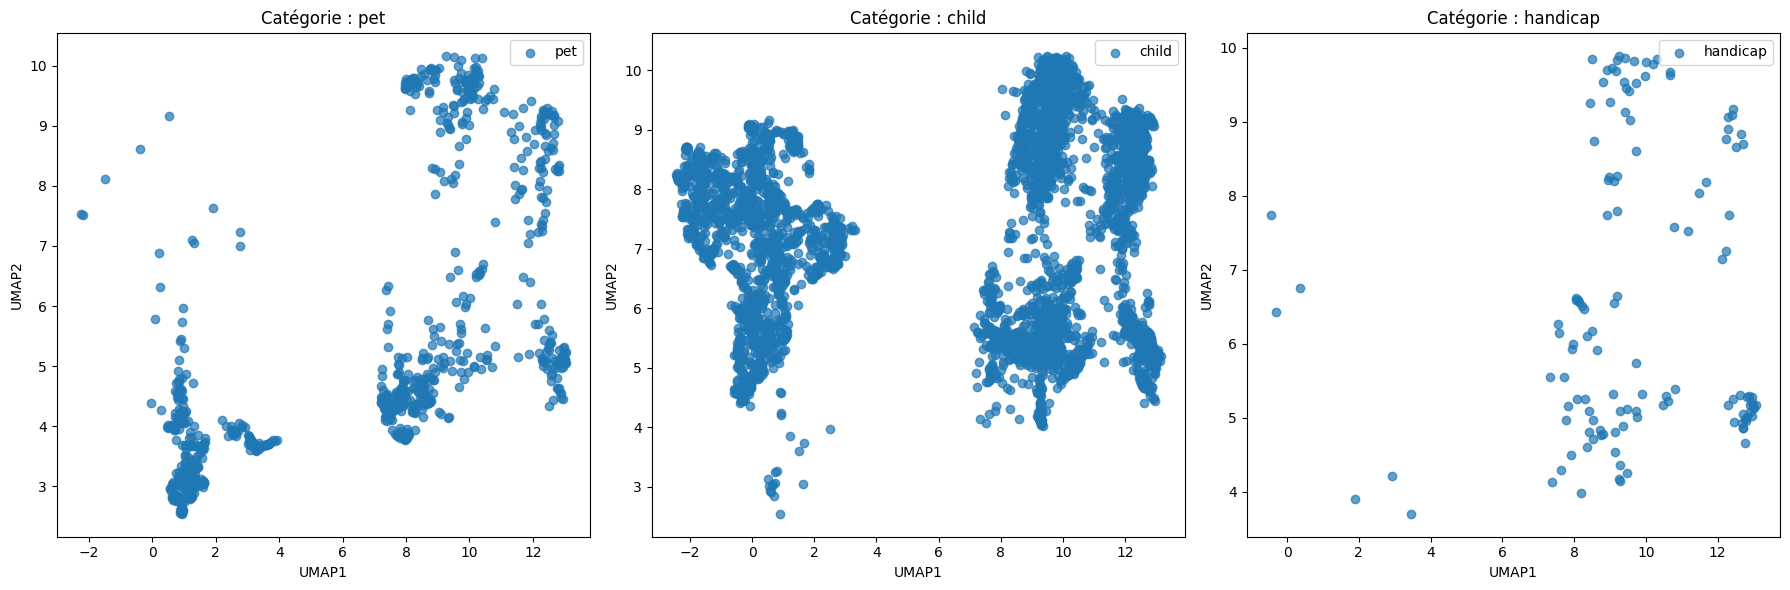

In [10]:
import umap
import matplotlib.pyplot as plt
import pandas as pd

# Réduction en 2D avec UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

df_plot = pd.DataFrame({
    "UMAP1": embedding_2d[:,0],
    "UMAP2": embedding_2d[:,1],
    "category": df["category"].to_list()
})

# Visualisation par catégorie
categories_to_plot = ["pet", "child", "handicap"]
fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, cat in zip(axes, categories_to_plot):
    df_cat = df_plot[df_plot["category"] == cat]
    ax.scatter(df_cat["UMAP1"], df_cat["UMAP2"], alpha=0.7, label=cat)
    ax.set_title(f"Catégorie : {cat}")
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    ax.legend()

plt.tight_layout()
plt.show()
